In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

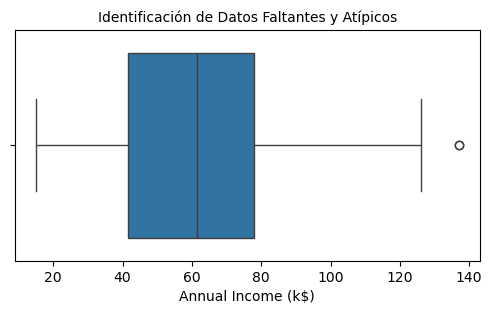

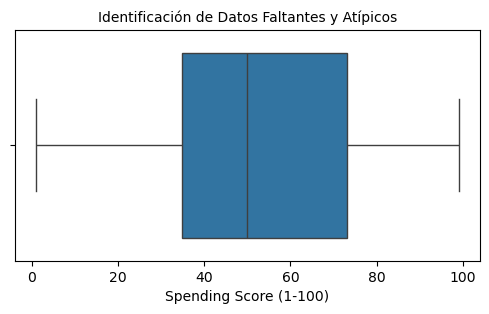

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [6]:
#Revisión de datos faltantes

edad = Datos['Age'].isin([0]).sum()
ingreso = Datos['Annual Income (k$)'].isin([0]).sum()
puntaje = Datos['Spending Score (1-100)'].isin([0]).sum()

if edad > 0:
    Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
    print('Se actualizan valores faltantes para el campo edad')
else:
    print('Sin datos faltantes en el campo edad')

if ingreso > 0:
    Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())
    print('Se actualizan valores faltantes para el campo ingreso anual')
else:
    print('Sin datos faltantes en el campo ingreso anual')

if puntaje > 0:
    Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())
    print('Se actualizan valores faltantes para el campo puntaje de gasto')
else:
    print('Sin datos faltantes en el campo puntaje de gasto')

Sin datos faltantes en el campo edad
Sin datos faltantes en el campo ingreso anual
Sin datos faltantes en el campo puntaje de gasto


In [7]:
#Conteo de Datos Atípicos

minScore=0
maxScore=100
Total_Atipicos=((Datos['Spending Score (1-100)']<minScore)|(Datos['Spending Score (1-100)']>maxScore)).sum()
print("El total de datos atípicos es {}{}".format(Total_Atipicos,"\n"))

# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<maxScore)&(Datos['Spending Score (1-100)']>minScore)]

Datos.info()

El total de datos atípicos es 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]
Datos.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


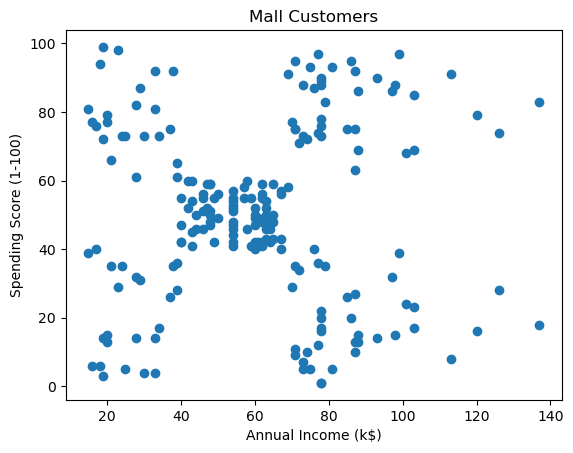

In [9]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

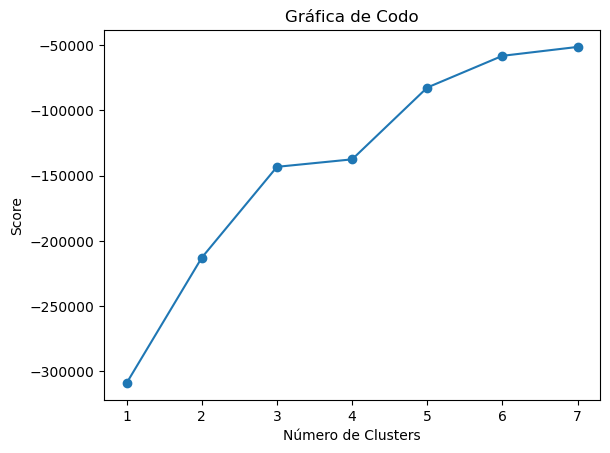

In [10]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [11]:
# Generación del modelo de Agrupamiento del modelo con K=6 

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=6, random_state=0)

In [12]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      5
2     20                  16                       6      2
3     23                  16                      77      5
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [13]:
# Normalización de datos
scaler = StandardScaler()
Datos_scaled = scaler.fit_transform(Datos.drop('Grupo', axis=1))

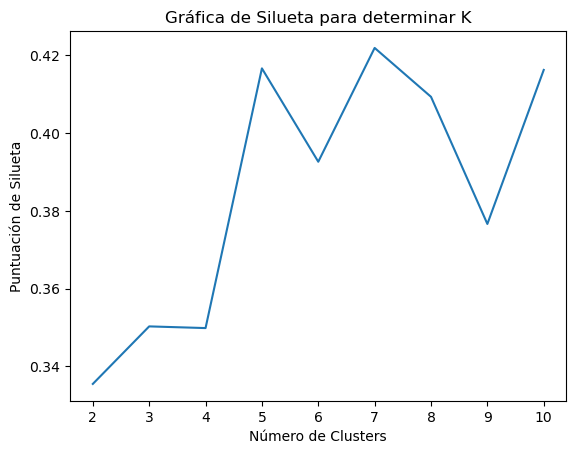

In [14]:
# Grafica de silueta para identificacion de K
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(Datos_scaled)
    silhouette_avg = silhouette_score(Datos_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualización de la gráfica de Silueta para determinar el número óptimo de clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Gráfica de Silueta para determinar K')
plt.show()

In [15]:
# Reducción de dimensionalidad para visualización
tsne = TSNE(n_components=2, random_state=0)
pca = PCA(n_components=2, random_state=0)

# Transformación de datos
Datos_tsne = tsne.fit_transform(Datos_scaled)
Datos_pca = pca.fit_transform(Datos_scaled)

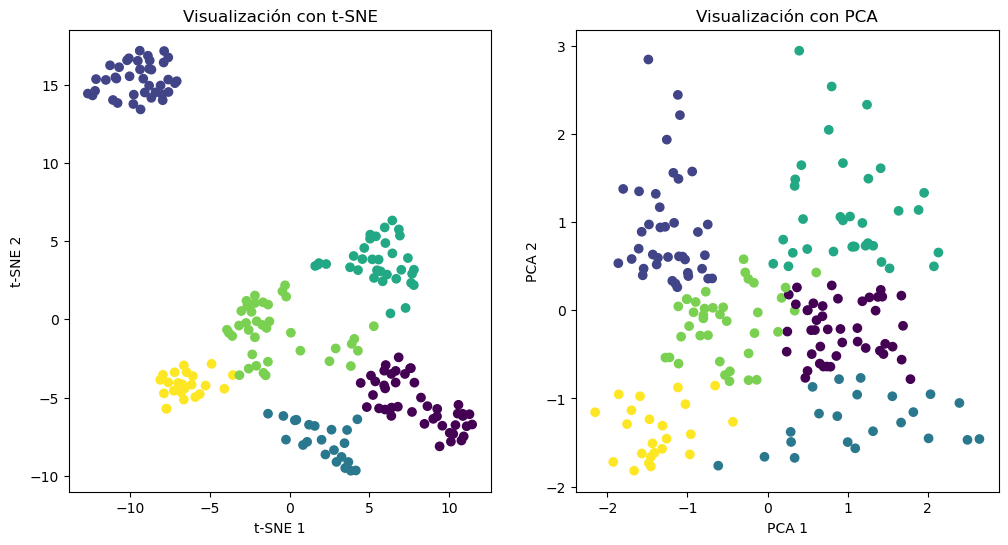

In [16]:
# Visualización de clusters con t-SNE y PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Datos_tsne[:, 0], Datos_tsne[:, 1], c=Datos['Grupo'], cmap='viridis')
plt.title('Visualización con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(1, 2, 2)
plt.scatter(Datos_pca[:, 0], Datos_pca[:, 1], c=Datos['Grupo'], cmap='viridis')
plt.title('Visualización con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [17]:
# Interpretación de clusters
cluster_means = Datos.groupby('Grupo').mean()
print(cluster_means)

             Age  Annual Income (k$)  Spending Score (1-100)
Grupo                                                       
0      56.340909           53.704545               49.386364
1      32.692308           86.538462               82.128205
2      44.318182           25.772727               20.272727
3      41.647059           88.735294               16.764706
4      27.315789           57.500000               48.447368
5      25.521739           26.304348               78.565217


In [18]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.45095124469943243 |
| Indice Calinski Harabasz |  166.5857109469557  |
|  Indice Davies Bouldin   | 0.7515325100425705  |
+--------------------------+---------------------+


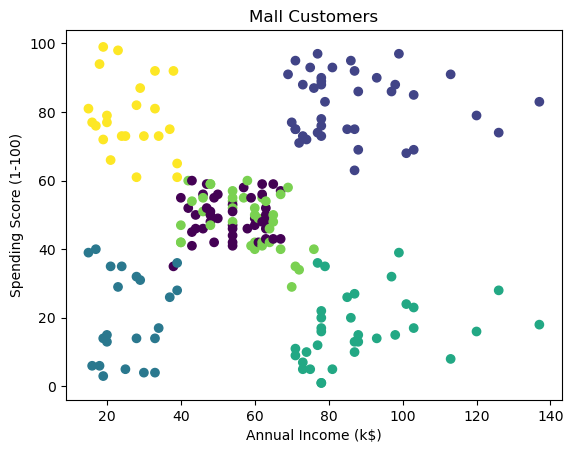

In [19]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

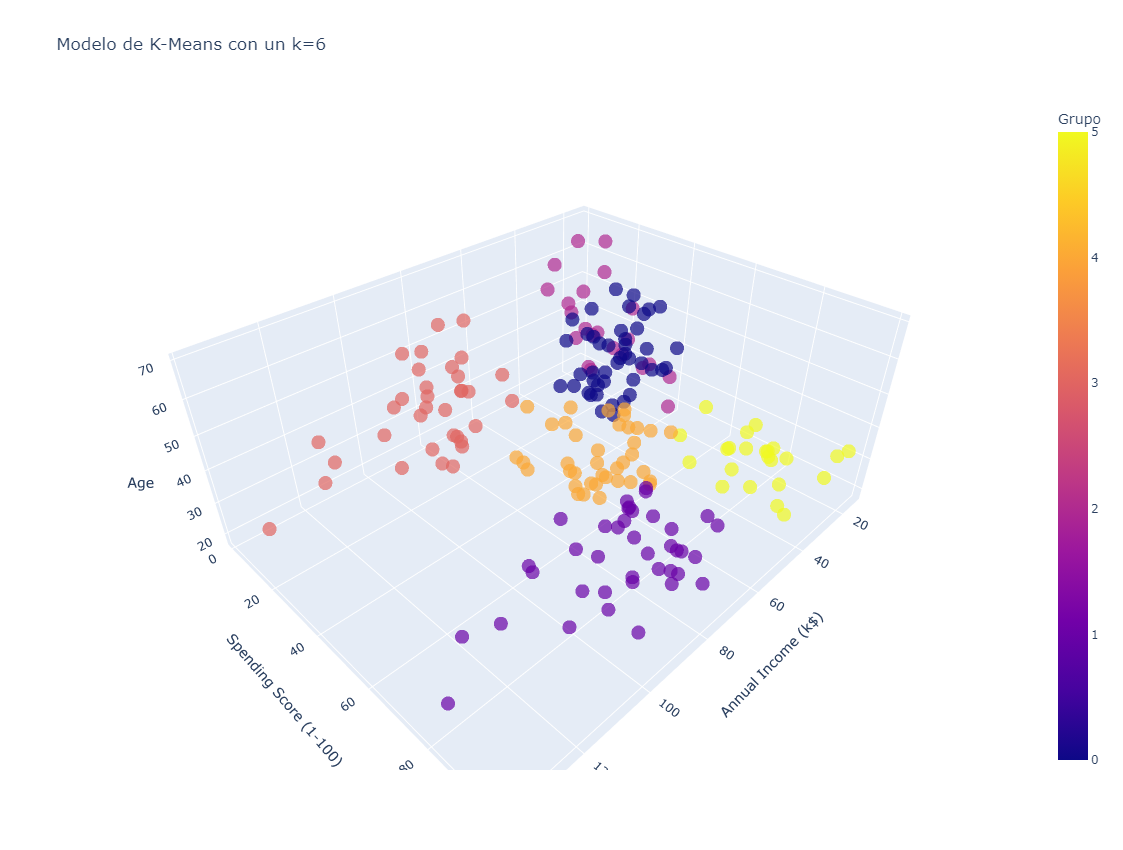

In [22]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 